In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q1 = QuantumRegister(5,name='qubit')
c1 = ClassicalRegister(5,name='bits')
qc1 = QuantumCircuit(q1,c1)

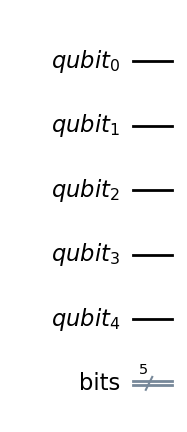

In [2]:
qc1.draw('mpl')

In [3]:
for i in range(5):
    qc1.x(q1[i])
    qc1.h(q1[i])
qc1.barrier()
for i in range(2):
    qc1.y(q1[i])
qc1.barrier()
for i in range(2,5):
    qc1.z(q1[i])

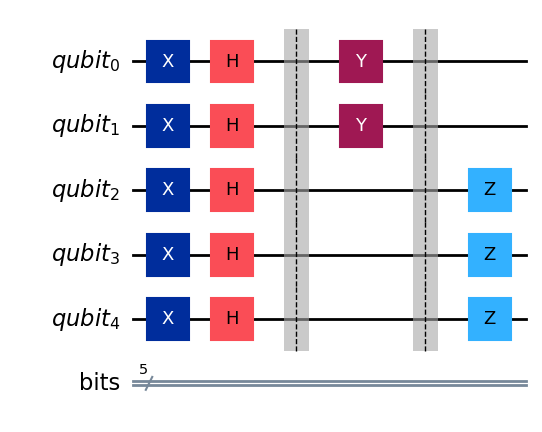

In [4]:
qc1.draw('mpl')

In [5]:
print(qc1.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{qubit}_{0} :  } & \lstick{{qubit}_{0} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} \barrier[0em]{4} & \qw & \gate{\mathrm{Y}} \barrier[0em]{4} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{1} :  } & \lstick{{qubit}_{1} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \gate{\mathrm{Y}} & \qw & \qw & \qw & \qw\\
	 	\nghost{{qubit}_{2} :  } & \lstick{{qubit}_{2} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{3} :  } & \lstick{{qubit}_{3} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{{qubit}_{4} :  } & \lstick{{qubit}_{4} :  } & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw & \qw & \qw & \gate{\mathrm{Z}} & \qw & \qw\\
	 	\nghost{\mathrm{{bits} :  }} & \lstick{\mathrm{{bits} :  }} &

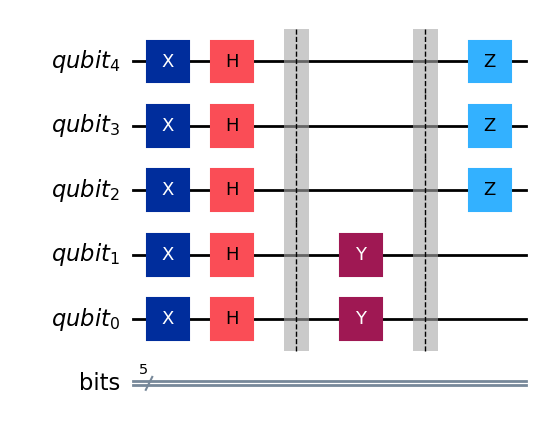

In [6]:
qc1.draw('mpl',reverse_bits=True)

C:\Github\Quantum\Quantum_Computing\Basics\basics_env\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:269: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: C:\Github\Quantum\Quantum_Computing\Basics\basics_env\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


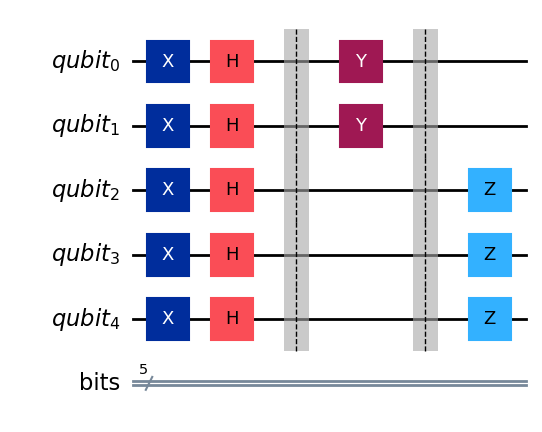

In [7]:
qc1.draw('mpl',style='iqx')

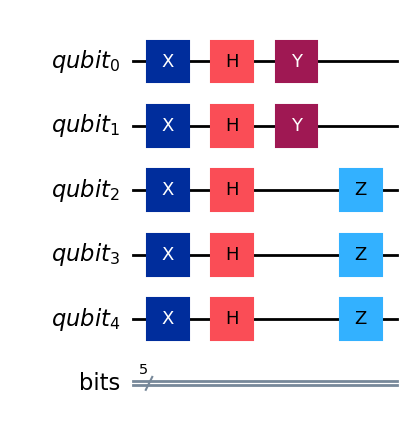

In [8]:
qc1.draw('mpl',plot_barriers=False)

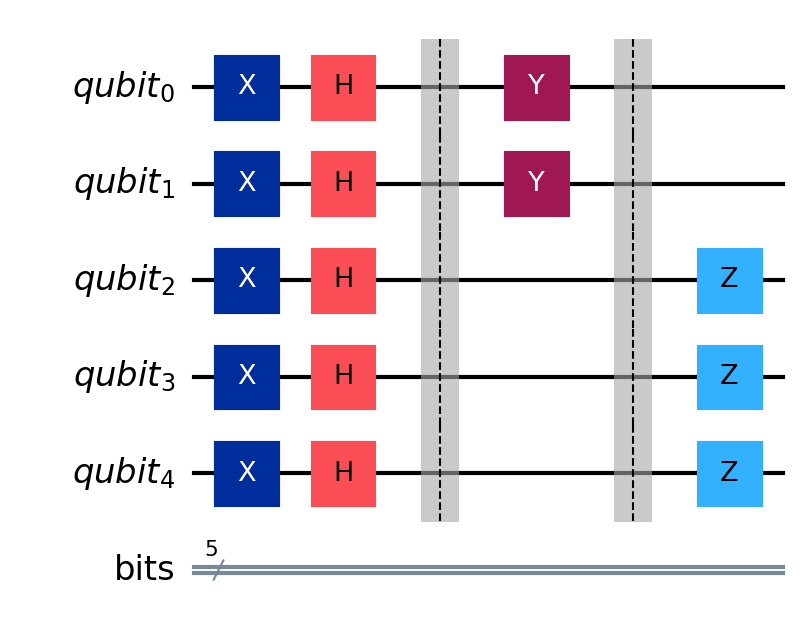

In [9]:
qc1.draw('mpl',scale=1.5)

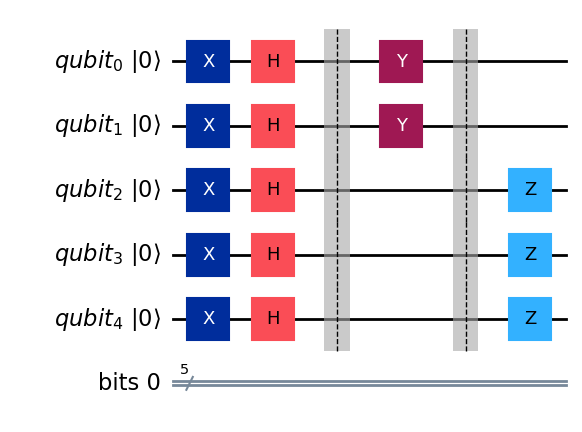

In [10]:
qc1.draw('mpl',initial_state=True)

In [11]:
qc1.measure_all()

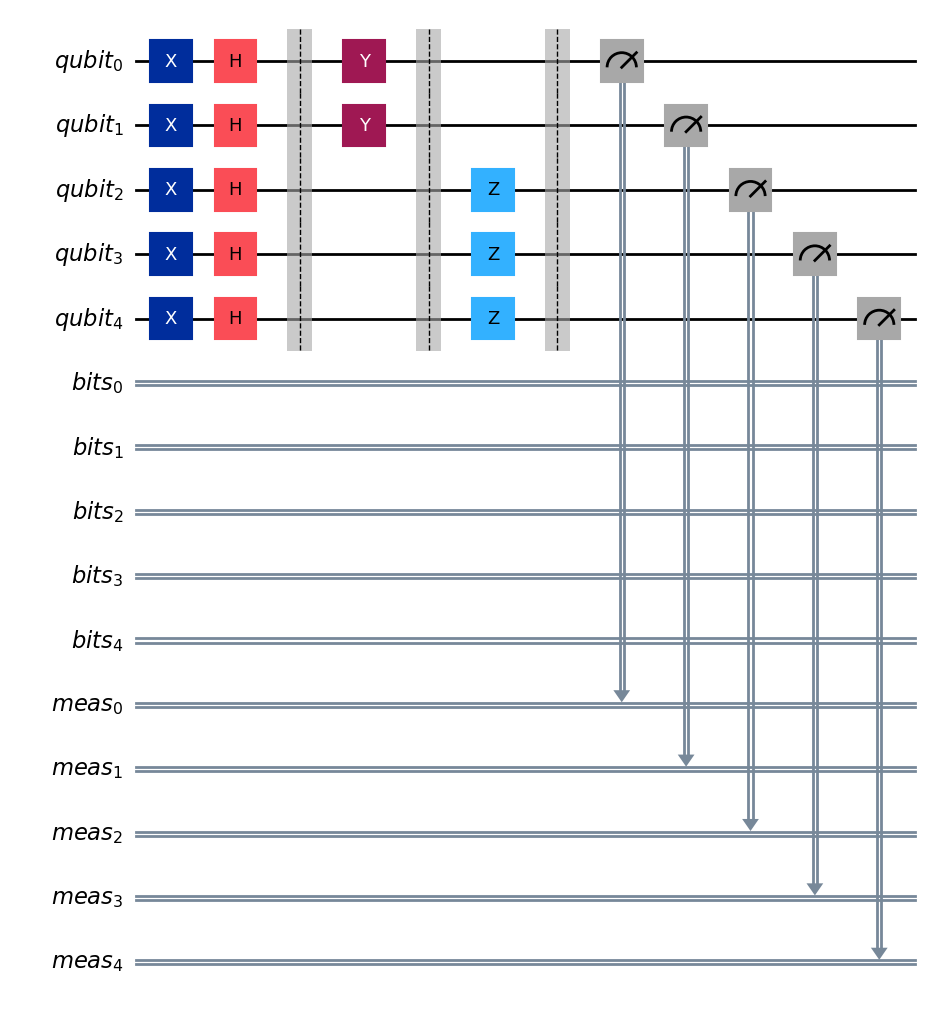

In [12]:
qc1.draw('mpl',cregbundle=False)

In [13]:
q2 = QuantumRegister(5)
qc2 = QuantumCircuit(q2)

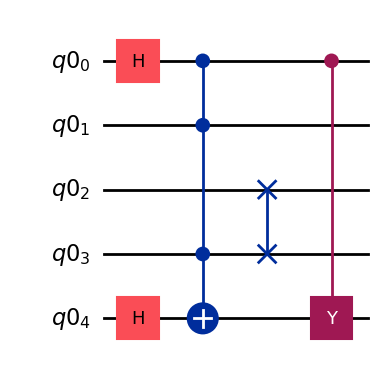

In [14]:
qc2.h(q2[0])
qc2.h(q2[4])
qc2.mcx([q2[0],q2[1],q2[3]],q2[4])
qc2.swap(q2[2],q2[3])
qc2.cy(q2[0],q2[4])
qc2.draw('mpl')

In [15]:
inverse_circuit = qc2.inverse()

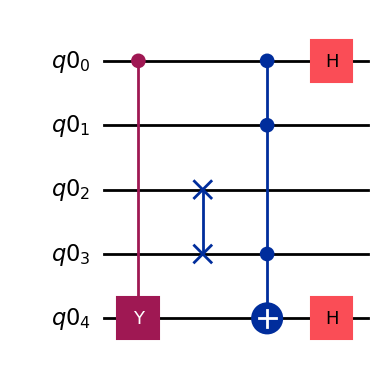

In [16]:
inverse_circuit.draw('mpl')

In [17]:
gate_01 = qc2.to_gate()

In [18]:
q3 = QuantumRegister(7)
qc3 = QuantumCircuit(q3)

In [19]:
qc3.append(gate_01,[q3[1],q3[2],q3[3],q3[4],q3[5]])

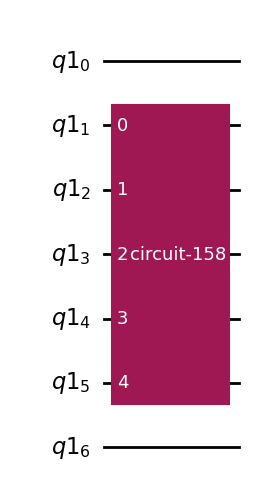

In [20]:
qc3.draw('mpl')

In [21]:
qc3.depth()

1

In [22]:
qc3.width()

7

In [23]:
from qiskit_ibm_runtime.fake_provider import FakeCambridgeV2

In [27]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [28]:
backend = FakeCambridgeV2()

In [29]:
backend

In [30]:
props = backend.properties()

In [31]:
for i in range(backend.configuration().n_qubits):
    print('The U gate have lenght',props.gate_length('u3',i)*1e9,'nanosecs')

The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 104.34782608695652 nanosecs
The U gate have lenght 260.8695652173913 nanosecs
The U gate have lenght 104.3478260

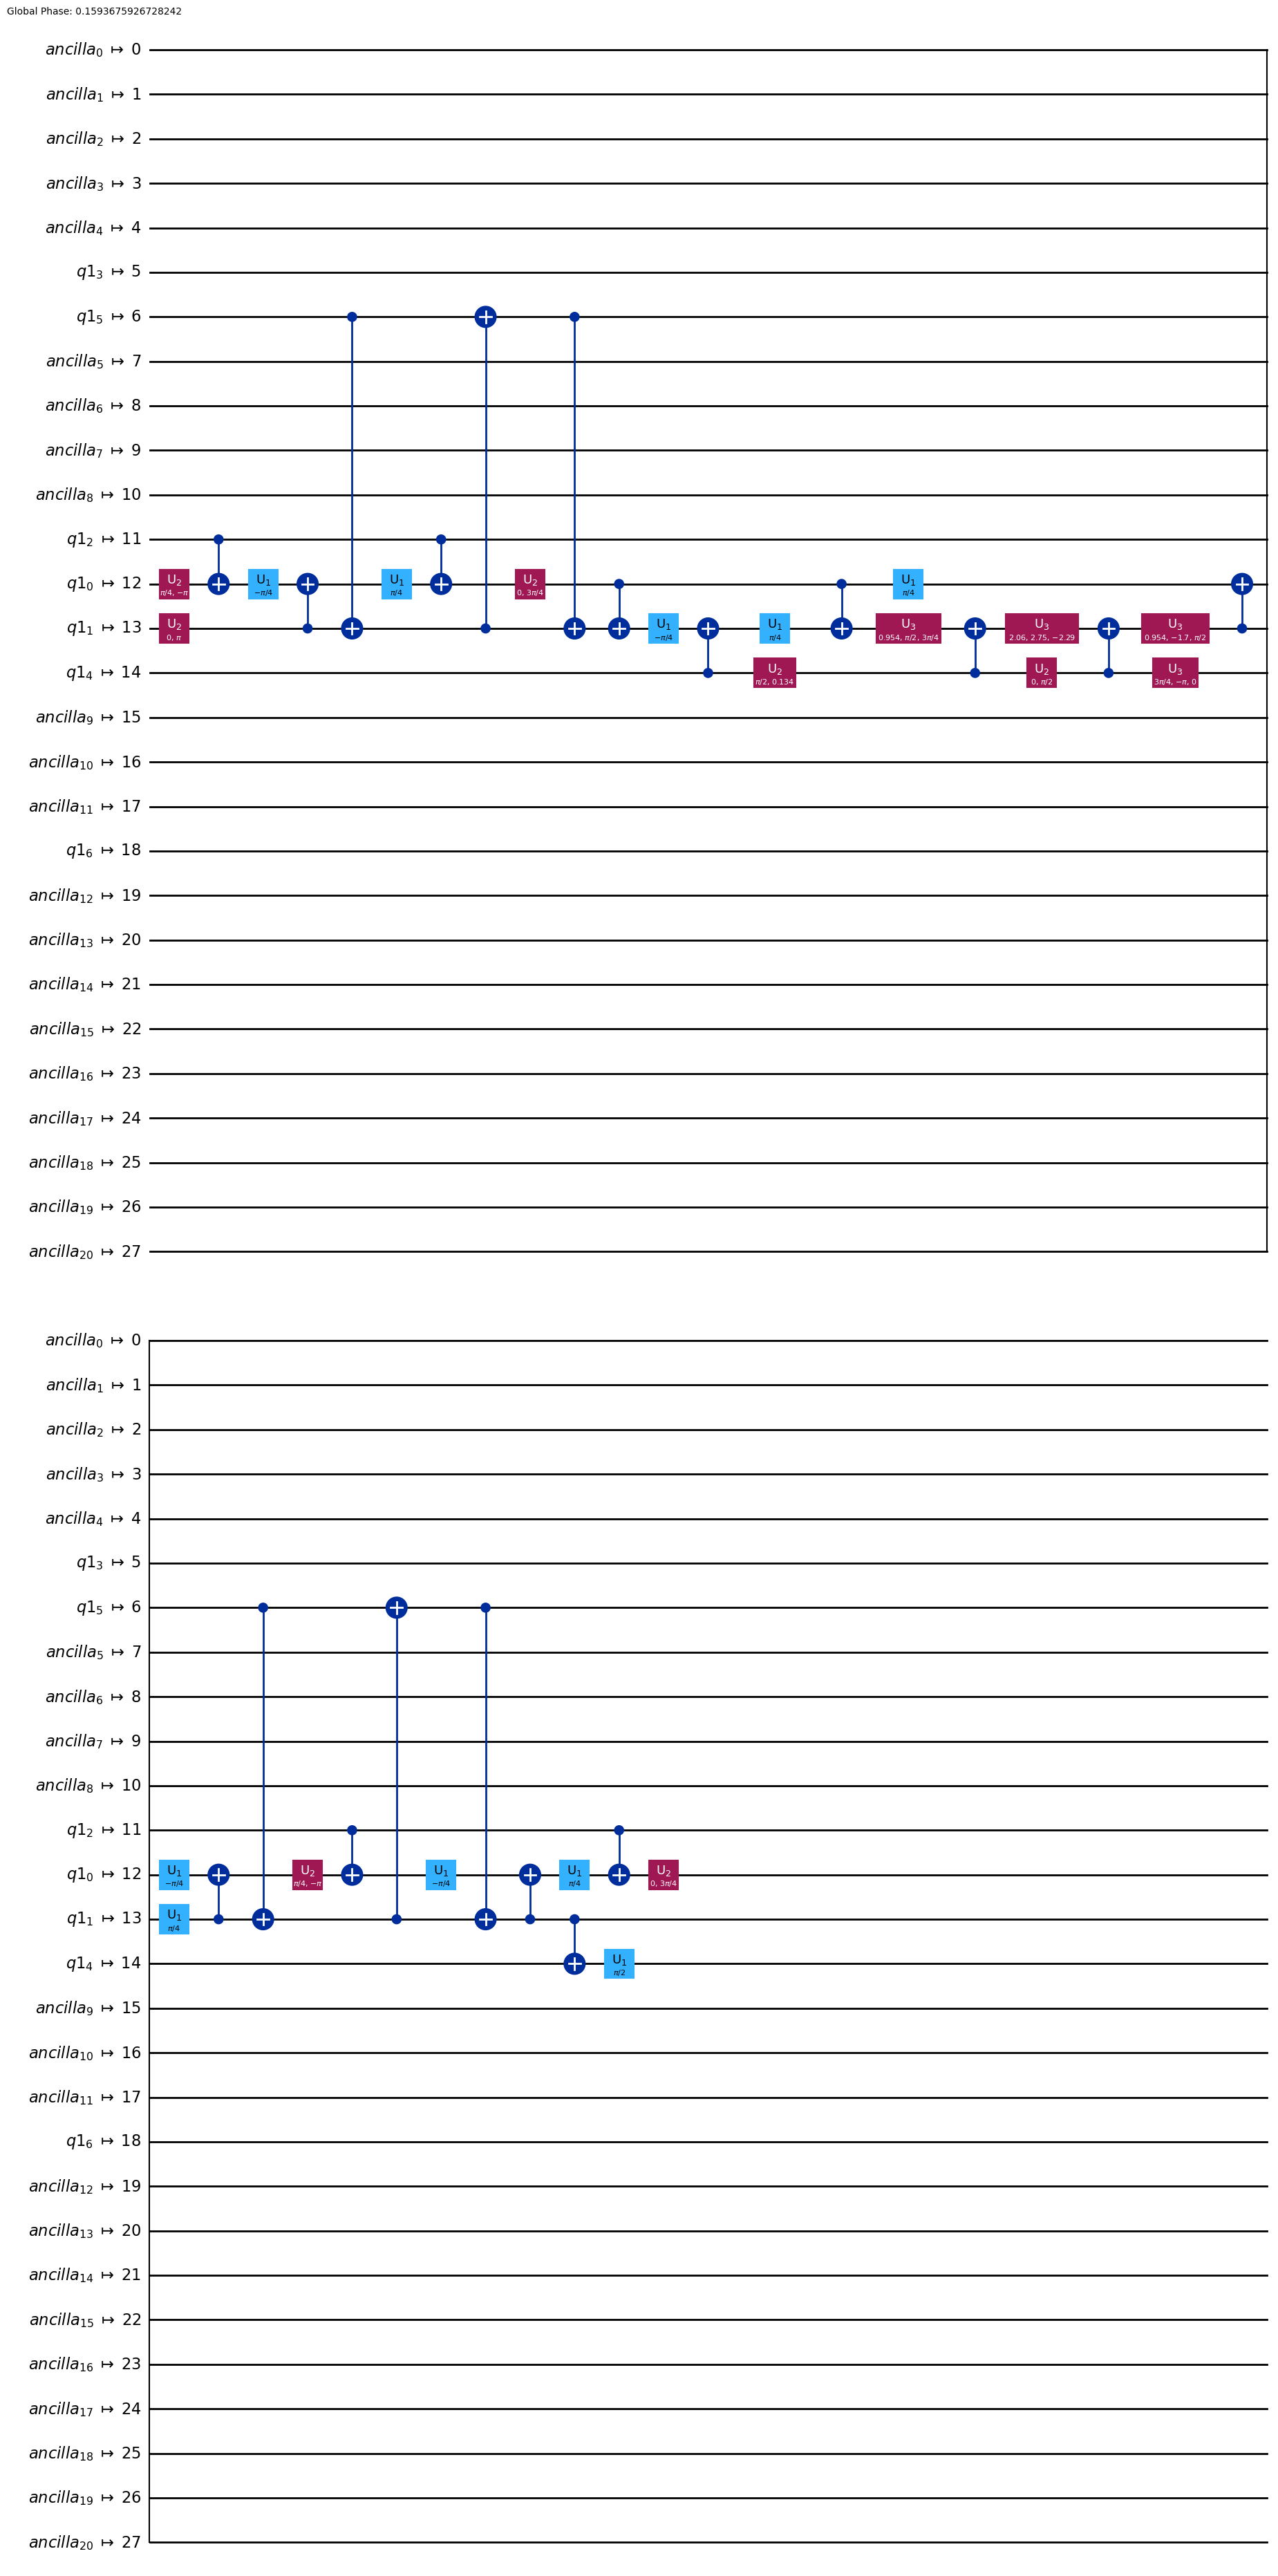

In [32]:
from qiskit import transpile
qc_compiled = transpile(qc3,backend)
qc_compiled.draw('mpl')

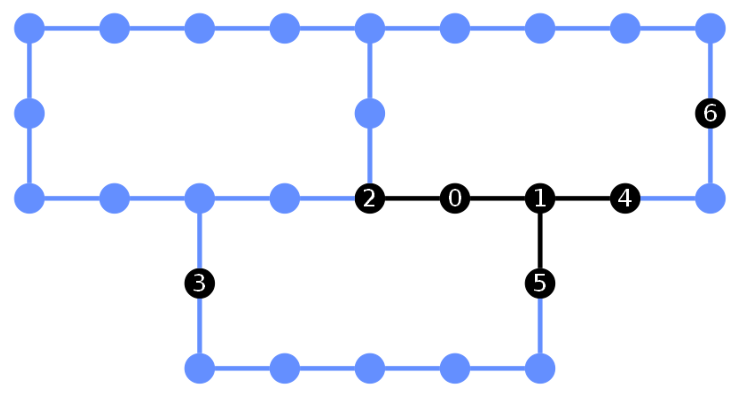

In [33]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_compiled,backend)

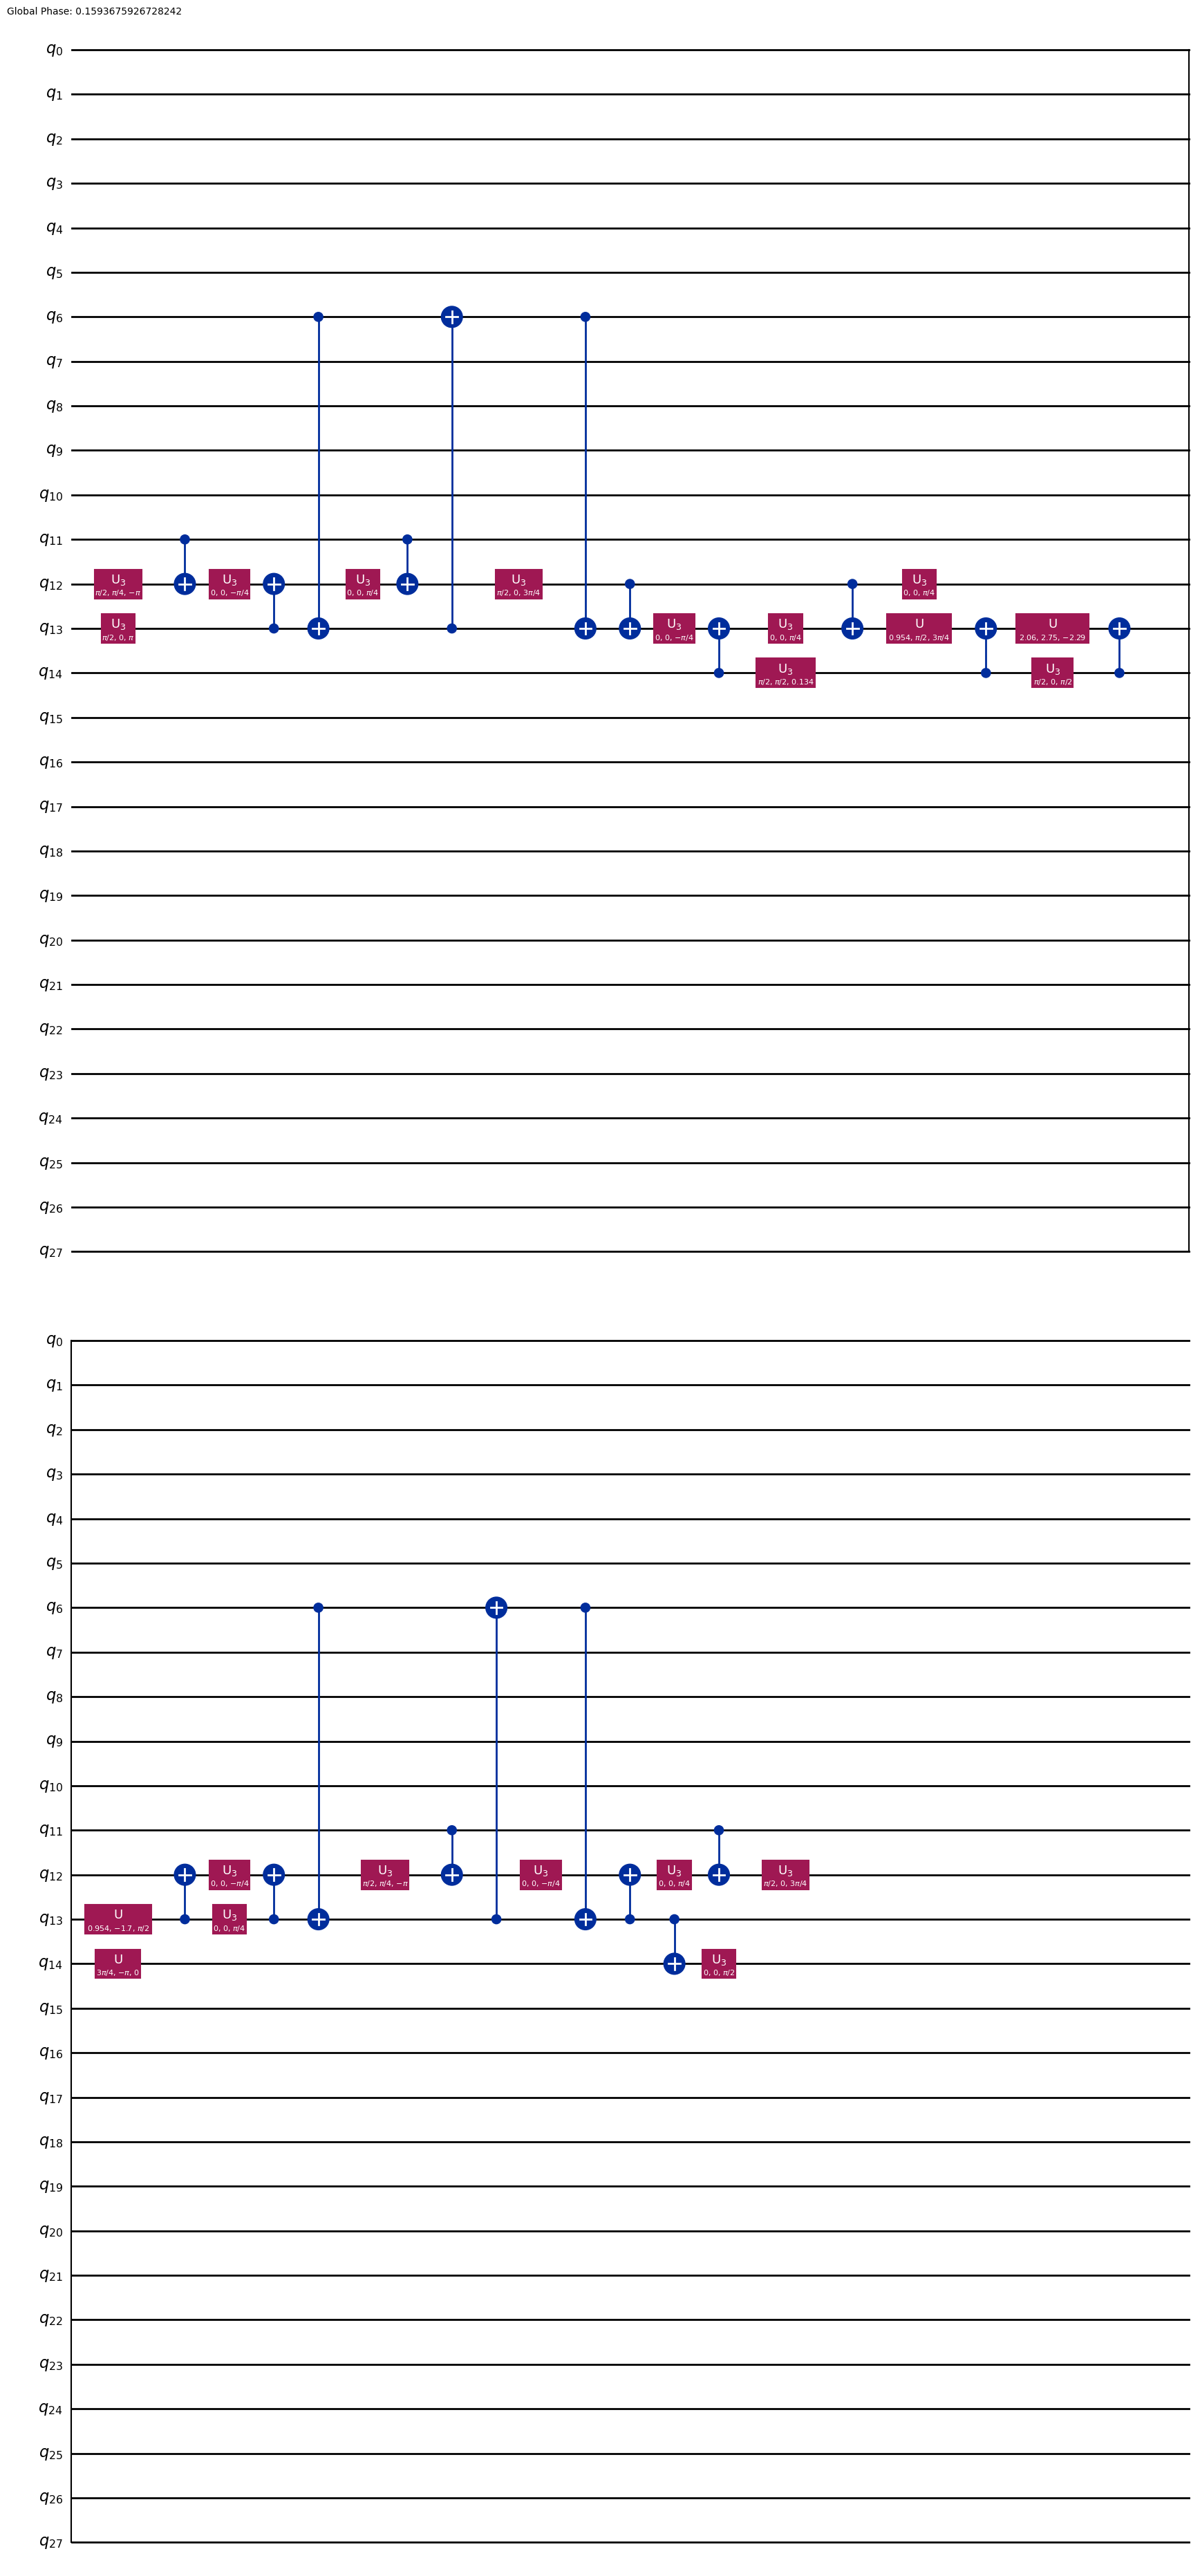

In [34]:
qc_compiled.decompose().draw('mpl')